In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-score-classification/train.csv
/kaggle/input/credit-score-classification/test.csv


In [2]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [3]:
data  = pd.read_csv('/kaggle/input/credit-score-classification/train.csv',low_memory=False)


In [4]:
data.sample(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
39761,0xfefb,CUS_0x34f2,February,Kaorii,23,008-83-1454,Accountant,40108.06,3554.338333,10,...,Standard,1325.46,39.573329,NaN,Yes,121.261184,166.63632290892963,Low_spent_Large_value_payments,337.5363261758918,Poor
42113,0x10cc3,CUS_0xaa52,February,NaN,40,394-74-4000,_______,19013.285,NaN,1,...,Good,193.58,25.322889,NaN,No,13.331753,186.12515823183446,Low_spent_Small_value_payments,240.08713085802026,Good
50364,0x13d1a,CUS_0x92b9,May,Jeb Blountz,16,855-40-7496,Teacher,46855.17,NaN,7,...,Standard,1653.0,41.435545,11 Years and 0 Months,Yes,145.552422,74.5108094586081,High_spent_Medium_value_payments,428.6965188607053,Poor
72556,0x1bf22,CUS_0x86d9,May,Emily Stephensonm,54,#F%$D@*&8,Accountant,20868.005,1574.000417,2,...,Good,905.47,41.386762,23 Years and 11 Months,No,48.647009,84.89298972578263,Low_spent_Large_value_payments,293.86004277597124,Standard
24207,0xa3d5,CUS_0xbfa1,August,Doug Palmere,51,576-86-0832,Architect,94525.68,6841.420287,7,...,Good,426.31,34.553854,23 Years and 5 Months,No,1113.719713,__10000__,High_spent_Medium_value_payments,899.9394966460918,Good
65582,0x19644,CUS_0x444c,July,James Reganj,26,804-29-1831,Developer,17174.67,1225.781553,6,...,Standard,891.74,27.817604,17 Years and 8 Months,No,123.440947,84.9806218493773,Low_spent_Large_value_payments,319.94162815062265,Good
95143,0x24379,CUS_0x9805,August,Josephinez,37,699-98-6012,Writer,57913.84,NaN,10,...,_,4187.48,30.822445,9 Years and 4 Months,Yes,272.439957,86.76083844439167,High_spent_Large_value_payments,382.2145380888583,Poor
22662,0x9ac8,CUS_0x97b0,July,Jonathanz,32,361-41-1814,Mechanic,23635.39,2239.615833,8,...,Standard,152.17,32.625673,NaN,Yes,46.917413,181.970287526457,Low_spent_Large_value_payments,265.0738832572663,Standard
49079,0x13591,CUS_0x17c5,August,Ayesha Rascoek,42,676-90-9901,Engineer,42265.53,NaN,7,...,Standard,2107.97,35.395267,13 Years and 10 Months,Yes,112.393902,__10000__,High_spent_Large_value_payments,376.8750697555805,Standard
7402,0x4160,CUS_0xbbf5,March,Tetsushi Kajimotog,43,413-06-1083,Musician,35346.69,2757.557500,1,...,Good,497.75,22.632318,NaN,No,23.593978,342.93156097256167,Low_spent_Small_value_payments,199.2302110622586,Standard


In [5]:
"""
ID: Represents a unique identification of an entry
Customer_ID: Represents a unique identification of a person
Month: Represents the month of the year
Name: Represents the name of a person
Age: Represents the age of the person
SSN: Represents the social security number of a person
Occupation: Represents the occupation of the person
Annual_Income: Represents the annual income of the person
Monthly_Inhand_Salary: Represents the monthly base salary of a person
Num_Bank_Accounts: Represents the number of bank accounts a person holds

Num_Credit_Card: Represents the number of other credit cards held by a person
Interest_Rate: Represents the interest rate on credit card
Num_of_Loan: Represents the number of loans taken from the bank
Type_of_Loan: Represents the types of loan taken by a person
Delay_from_due_date: Represents the average number of days delayed from the payment date
Num_of_Delayed_Payment: Represents the average number of payments delayed by a person


Changed_Credit_Limit: Represents the percentage change in credit card limit
Num_Credit_Inquiries: Represents the number of credit card inquiries
Credit_Mix: Represents the classification of the mix of credits


Outstanding_Debt: Represents the remaining debt to be paid (in USD)
Credit_Utilization_Ratio: Represents the utilization ratio of credit card
Credit_History_Age: Represents the age of credit history of the person

Payment_of_Min_Amount: Represents whether only the minimum amount was paid by the person
Total_EMI_per_month: Represents the monthly EMI payments (in USD)
Amount_invested_monthly: Represents the monthly amount invested by the customer (in USD)
Payment_Behaviour: Represents the payment behavior of the customer (in USD)
Monthly_Balance: Represents the monthly balance amount of the customer (in USD)

Credit_Score:Represents the bracket of credit score (Poor, Standard, Good) "Target"


"""
print()

# EDA

### Train_data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

### Test_data

In [7]:
data.columns = data.columns.str.lower()


In [8]:
def get_sum_nan(data):
    filt = data.isna().sum()
    return filt[filt>0]

In [9]:
print(f'Shape of train data: {data.shape}')


Shape of train data: (100000, 28)


In [10]:
# cols = data.columns.values
# for c in cols:
#     print(c)

## check for any duplication

In [11]:
data.duplicated().sum()

0

## unique values on each cols

In [12]:
## train
data.nunique()

id                          100000
customer_id                  12500
month                            8
name                         10139
age                           1788
ssn                          12501
occupation                      16
annual_income                18940
monthly_inhand_salary        13235
num_bank_accounts              943
num_credit_card               1179
interest_rate                 1750
num_of_loan                    434
type_of_loan                  6260
delay_from_due_date             73
num_of_delayed_payment         749
changed_credit_limit          4384
num_credit_inquiries          1223
credit_mix                       4
outstanding_debt             13178
credit_utilization_ratio    100000
credit_history_age             404
payment_of_min_amount            3
total_emi_per_month          14950
amount_invested_monthly      91049
payment_behaviour                7
monthly_balance              98792
credit_score                     3
dtype: int64

In [13]:
data.columns

Index(['id', 'customer_id', 'month', 'name', 'age', 'ssn', 'occupation',
       'annual_income', 'monthly_inhand_salary', 'num_bank_accounts',
       'num_credit_card', 'interest_rate', 'num_of_loan', 'type_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'credit_mix', 'outstanding_debt',
       'credit_utilization_ratio', 'credit_history_age',
       'payment_of_min_amount', 'total_emi_per_month',
       'amount_invested_monthly', 'payment_behaviour', 'monthly_balance',
       'credit_score'],
      dtype='object')

# Data preprocessing

## 1. check each col and its values to set the proper data type for each of them

In [14]:
get_sum_nan(data)

name                        9985
monthly_inhand_salary      15002
type_of_loan               11408
num_of_delayed_payment      7002
num_credit_inquiries        1965
credit_history_age          9030
amount_invested_monthly     4479
monthly_balance             1200
dtype: int64

## month 

In [15]:
data.month.unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August'], dtype=object)

## name

In [16]:
data.name.unique()

array(['Aaron Maashoh', nan, 'Rick Rothackerj', ..., 'Chris Wickhamm',
       'Sarah McBridec', 'Nicks'], dtype=object)

## age

### Train

In [17]:

unique_age = data.age.unique()
# for i in unique_age:
#     print(i)
print(unique_age)

['23' '-500' '28_' ... '4808_' '2263' '1342']


> we have to make those values to be valid

In [18]:
def filter_col(value):
    if '-' in value:
        return value.split('-')[1]
    elif '_' in value:
        return value.split('_')[0]
    else:
        return value

In [19]:
data.age = data.age.apply(filter_col)

In [20]:
data.age.unique()

array(['23', '500', '28', ..., '4808', '2263', '1342'], dtype=object)

In [21]:
## check data type of the age col
data.age = data.age.astype(int)

## SSN

In [22]:
data.ssn.unique()

array(['821-00-0265', '#F%$D@*&8', '004-07-5839', ..., '133-16-7738',
       '031-35-0942', '078-73-5990'], dtype=object)

In [23]:
data.ssn.value_counts()

#F%$D@*&8      5572
078-73-5990       8
486-78-3816       8
750-67-7525       8
903-50-0305       8
               ... 
856-06-6147       4
753-72-2651       4
331-28-1921       4
604-62-6133       4
286-44-9634       4
Name: ssn, Length: 12501, dtype: int64

> may be value ** #F%$D@*&8 ** is representing a missing value for that col!

## Occupation

### train

In [24]:
data.occupation.unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [25]:
(data[data.occupation=='_______'].shape[0]/data.shape[0])*100

7.062

> percentage of missing values on occupation col is 7% so we can drop these rows or predict there values!

In [26]:
data.loc[data["occupation"] == "_______", "occupation"] = np.nan

In [27]:
s = get_sum_nan(data)
s

name                        9985
occupation                  7062
monthly_inhand_salary      15002
type_of_loan               11408
num_of_delayed_payment      7002
num_credit_inquiries        1965
credit_history_age          9030
amount_invested_monthly     4479
monthly_balance             1200
dtype: int64

In [28]:
def get_categorical_cols():
    return data.select_dtypes(include=['object']).columns

## annual_income

In [29]:
 
data.annual_income.unique()

array(['19114.12', '34847.84', '34847.84_', ..., '20002.88', '39628.99',
       '39628.99_'], dtype=object)

> we have to make those values to be valid

In [30]:
data.annual_income = data.annual_income.apply(filter_col)

In [31]:
data.annual_income = data.annual_income.astype(float)

In [32]:
# sns.distplot(data.annual_income.value_counts())

## num_of_loan

In [33]:

data.num_of_loan.unique()

array(['4', '1', '3', '967', '-100', '0', '0_', '2', '3_', '2_', '7', '5',
       '5_', '6', '8', '8_', '9', '9_', '4_', '7_', '1_', '1464', '6_',
       '622', '352', '472', '1017', '945', '146', '563', '341', '444',
       '720', '1485', '49', '737', '1106', '466', '728', '313', '843',
       '597_', '617', '119', '663', '640', '92_', '1019', '501', '1302',
       '39', '716', '848', '931', '1214', '186', '424', '1001', '1110',
       '1152', '457', '1433', '1187', '52', '1480', '1047', '1035',
       '1347_', '33', '193', '699', '329', '1451', '484', '132', '649',
       '995', '545', '684', '1135', '1094', '1204', '654', '58', '348',
       '614', '1363', '323', '1406', '1348', '430', '153', '1461', '905',
       '1312', '1424', '1154', '95', '1353', '1228', '819', '1006', '795',
       '359', '1209', '590', '696', '1185_', '1465', '911', '1181', '70',
       '816', '1369', '143', '1416', '455', '55', '1096', '1474', '420',
       '1131', '904', '89', '1259', '527', '1241', '449', 

In [34]:
data.num_of_loan = data.num_of_loan.apply(filter_col)

In [35]:
ser = data.num_of_loan
data.num_of_loan=pd.to_numeric(ser,errors='coerce')

In [36]:
data.num_of_loan.dtype

dtype('int64')

In [37]:
s = get_sum_nan(data)
s

name                        9985
occupation                  7062
monthly_inhand_salary      15002
type_of_loan               11408
num_of_delayed_payment      7002
num_credit_inquiries        1965
credit_history_age          9030
amount_invested_monthly     4479
monthly_balance             1200
dtype: int64

In [38]:
get_categorical_cols()

Index(['id', 'customer_id', 'month', 'name', 'ssn', 'occupation',
       'type_of_loan', 'num_of_delayed_payment', 'changed_credit_limit',
       'credit_mix', 'outstanding_debt', 'credit_history_age',
       'payment_of_min_amount', 'amount_invested_monthly', 'payment_behaviour',
       'monthly_balance', 'credit_score'],
      dtype='object')

## num_of_delayed_payment

In [39]:

data.num_of_delayed_payment

0          7
1        NaN
2          7
3          4
4        NaN
        ... 
99995      7
99996      7
99997      6
99998    NaN
99999      6
Name: num_of_delayed_payment, Length: 100000, dtype: object

In [40]:
data.num_of_delayed_payment.isna().sum()

7002

In [41]:

data.num_of_delayed_payment.unique()

array(['7', nan, '4', '8_', '6', '1', '-1', '3_', '0', '8', '5', '3', '9',
       '12', '15', '17', '10', '2', '2_', '11', '14', '20', '22', '13',
       '13_', '14_', '16', '12_', '18', '19', '23', '24', '21', '3318',
       '3083', '22_', '1338', '4_', '26', '11_', '3104', '21_', '25',
       '10_', '183_', '9_', '1106', '834', '19_', '24_', '17_', '23_',
       '2672', '20_', '2008', '-3', '538', '6_', '1_', '16_', '27', '-2',
       '3478', '2420', '15_', '707', '708', '26_', '18_', '3815', '28',
       '5_', '1867', '2250', '1463', '25_', '7_', '4126', '2882', '1941',
       '2655', '2628', '132', '3069', '306', '0_', '3539', '3684', '1823',
       '4128', '1946', '827', '2297', '2566', '904', '182', '929', '3568',
       '2503', '1552', '2812', '1697', '3764', '851', '3905', '923', '88',
       '1668', '3253', '808', '2689', '3858', '642', '3457', '1402',
       '1732', '3154', '847', '3037', '2204', '3103', '1063', '2056',
       '1282', '1841', '2569_', '211', '793', '3484', '4

In [42]:
def filter_(value:str):
    if '_' in str(value):
        return value.split('_')[0]
    else:
        return value
data.num_of_delayed_payment = data.num_of_delayed_payment.apply(filter_)

In [43]:
data.num_of_delayed_payment = pd.to_numeric(data.num_of_delayed_payment,errors='coerce',downcast='integer')

In [44]:
data.num_of_delayed_payment.dtype

dtype('float64')

In [45]:
data.num_of_delayed_payment.isna().sum()

7002

In [46]:
get_sum_nan(data)

name                        9985
occupation                  7062
monthly_inhand_salary      15002
type_of_loan               11408
num_of_delayed_payment      7002
num_credit_inquiries        1965
credit_history_age          9030
amount_invested_monthly     4479
monthly_balance             1200
dtype: int64

In [47]:
get_categorical_cols()

Index(['id', 'customer_id', 'month', 'name', 'ssn', 'occupation',
       'type_of_loan', 'changed_credit_limit', 'credit_mix',
       'outstanding_debt', 'credit_history_age', 'payment_of_min_amount',
       'amount_invested_monthly', 'payment_behaviour', 'monthly_balance',
       'credit_score'],
      dtype='object')

## changed_credit_limit

In [48]:
data.changed_credit_limit.value_counts()

_                     2091
8.22                   133
11.5                   127
11.32                  126
7.35                   121
                      ... 
-1.84                    1
0.8899999999999999       1
28.06                    1
1.5599999999999996       1
21.17                    1
Name: changed_credit_limit, Length: 4384, dtype: int64

In [49]:
data.changed_credit_limit.unique()

array(['11.27', '_', '6.27', ..., '17.509999999999998', '25.16', '21.17'],
      dtype=object)

> so we can '_' is a missing value on that col!.and we can round these value to 2 places floating point 


In [50]:
 data.loc[data["changed_credit_limit"] == "_", "changed_credit_limit"] = np.nan

In [51]:
data.changed_credit_limit = data.changed_credit_limit.astype(float)

In [52]:
data.changed_credit_limit = round(data.changed_credit_limit,2)

In [53]:
data.changed_credit_limit

0        11.27
1        11.27
2          NaN
3         6.27
4        11.27
         ...  
99995    11.50
99996    11.50
99997    11.50
99998    11.50
99999    11.50
Name: changed_credit_limit, Length: 100000, dtype: float64

## credit_mix

In [54]:
data.credit_mix.value_counts()

Standard    36479
Good        24337
_           20195
Bad         18989
Name: credit_mix, dtype: int64

> missing values on credit_mix col! we can replace it with nan until predict there values

In [55]:
data.loc[data["credit_mix"] == "_", "credit_mix"] = np.nan

## outstanding_debt

In [56]:
data.outstanding_debt.value_counts()

1360.45     24
460.46      23
1151.7      23
1109.03     23
467.7       16
            ..
245.46_      1
645.77_      1
174.79_      1
1181.13_     1
1013.53_     1
Name: outstanding_debt, Length: 13178, dtype: int64

In [57]:
data.outstanding_debt.unique()

array(['809.98', '605.03', '1303.01', ..., '3571.7_', '3571.7', '502.38'],
      dtype=object)

> we have to make those values to be valid numbers!

In [58]:
data.outstanding_debt = data.outstanding_debt.apply(filter_)

In [59]:
data.outstanding_debt  = data.outstanding_debt.astype(float)

In [60]:
# get_sum_nan(data)

## credit_history_age

In [61]:
data.credit_history_age.value_counts()

15 Years and 11 Months    446
19 Years and 4 Months     445
19 Years and 5 Months     444
17 Years and 11 Months    443
19 Years and 3 Months     441
                         ... 
0 Years and 3 Months       20
0 Years and 2 Months       15
33 Years and 7 Months      14
33 Years and 8 Months      12
0 Years and 1 Months        2
Name: credit_history_age, Length: 404, dtype: int64

> we can seperate this col to Years and Months of the credit age!

In [62]:
years  = []
months = []
for value in data.credit_history_age:
    if value is np.nan:
        years.append(np.nan)
        months.append(np.nan)
    else:
        new_str = value.lower().split()
        years_ = int(new_str[0])
        months_ = int(new_str[new_str.index('and')+1])
        years.append(years_)
        months.append(months_)

In [63]:
df = data.copy()
df['credit_age_years'] = pd.Series(years)
df['credit_age_months'] = pd.Series(months)    

In [64]:
df.drop('credit_history_age',axis=1,inplace=True)

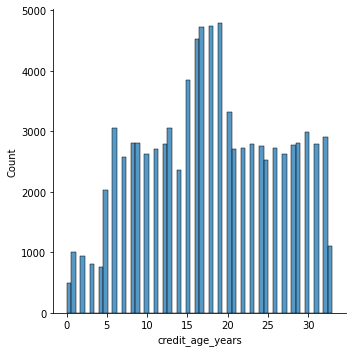

In [65]:
sns.displot(df['credit_age_years'])

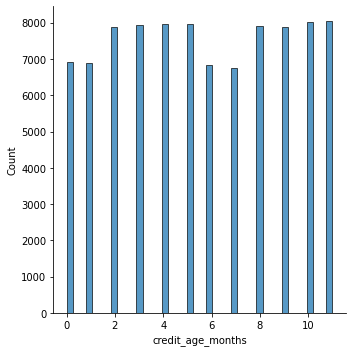

In [66]:
sns.displot(df['credit_age_months'])

In [67]:
data = df

In [68]:
get_sum_nan(data)

name                        9985
occupation                  7062
monthly_inhand_salary      15002
type_of_loan               11408
num_of_delayed_payment      7002
changed_credit_limit        2091
num_credit_inquiries        1965
credit_mix                 20195
amount_invested_monthly     4479
monthly_balance             1200
credit_age_years            9030
credit_age_months           9030
dtype: int64

In [69]:
get_categorical_cols()

Index(['id', 'customer_id', 'month', 'name', 'ssn', 'occupation',
       'type_of_loan', 'credit_mix', 'payment_of_min_amount',
       'amount_invested_monthly', 'payment_behaviour', 'monthly_balance',
       'credit_score'],
      dtype='object')

## payment_of_min_amount

In [70]:
data.payment_of_min_amount.value_counts()

Yes    52326
No     35667
NM     12007
Name: payment_of_min_amount, dtype: int64

 > NM is representing a missing value

In [71]:
data.loc[data['payment_of_min_amount']=='NM','payment_of_min_amount'] = np.nan

## amount_invested_monthly

In [72]:
data.amount_invested_monthly

0         80.41529543900253
1        118.28022162236736
2           81.699521264648
3         199.4580743910713
4        41.420153086217326
                ...        
99995     60.97133255718485
99996     54.18595028760385
99997     24.02847744864441
99998    251.67258219721603
99999     167.1638651610451
Name: amount_invested_monthly, Length: 100000, dtype: object

In [73]:
data.amount_invested_monthly.unique()

array(['80.41529543900253', '118.28022162236736', '81.699521264648', ...,
       '24.02847744864441', '251.67258219721603', '167.1638651610451'],
      dtype=object)

In [74]:
data.amount_invested_monthly.sample(50)
## values_format that should be fixed :
#     __10000__
data[data.amount_invested_monthly=='__10000__'].shape

(4305, 29)

In [75]:
data.loc[data['amount_invested_monthly']=='__10000__','amount_invested_monthly'] = 10000

In [76]:
data.amount_invested_monthly = data.amount_invested_monthly.astype(float)

In [77]:
data.amount_invested_monthly = round(data.amount_invested_monthly,2)

In [78]:
data.amount_invested_monthly

0         80.42
1        118.28
2         81.70
3        199.46
4         41.42
          ...  
99995     60.97
99996     54.19
99997     24.03
99998    251.67
99999    167.16
Name: amount_invested_monthly, Length: 100000, dtype: float64

## payment_behaviour

In [79]:
data.payment_behaviour.value_counts()

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: payment_behaviour, dtype: int64

In [80]:
data.loc[data['payment_behaviour']=='!@9#%8','payment_behaviour'] = np.nan

## monthly_balance

In [81]:
data.monthly_balance.sample(20)

34132     327.6379356994672
18847     294.2616340853217
93287    463.55576647911107
73152    293.88418949331486
47198      664.211302267013
50703     293.5493617168036
13025     286.9626374582823
12        444.8670318506144
34384    346.60430579921746
97531    1075.7904263113094
99689     349.2684760263832
57880    465.38456484928713
81827     264.0082467544081
93528    291.20557276189186
96206    432.57117915185324
14086     525.1490302144448
73445    199.90145163240638
46296    454.84832283802984
77181     368.2077435043855
50616     358.2733391312663
Name: monthly_balance, dtype: object

In [82]:
data.monthly_balance.unique()

array(['312.49408867943663', '284.62916249607184', '331.2098628537912',
       ..., '516.8090832742814', '319.1649785257098', '393.6736955618808'],
      dtype=object)

> may the values on this col are too large to fit in the float data type! 

In [83]:
# data.monthly_balance = data.monthly_balance.astype(float)
#  '__-333333333333333333333333333__' causes an error!

In [84]:
data.loc[data.monthly_balance=='__-333333333333333333333333333__','monthly_balance'] = 0

In [85]:
data.monthly_balance = data.monthly_balance.astype(float)

## credit_score

In [86]:
data.credit_score.value_counts()

Standard    53174
Poor        28998
Good        17828
Name: credit_score, dtype: int64

In [87]:
data.sample(20)

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,...,outstanding_debt,credit_utilization_ratio,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score,credit_age_years,credit_age_months
20004,0x8b36,CUS_0x10c0,May,Scheyderx,39,658-53-1756,Architect,49454.130,4328.177500,8,...,1388.56,32.929217,Yes,73.346359,170.39,High_spent_Medium_value_payments,439.076737,Poor,13.0,1.0
42191,0x10d35,CUS_0xc4f5,August,NaN,23,062-13-0532,Musician,117551.960,NaN,8,...,981.69,37.119357,Yes,344.166600,275.12,Low_spent_Large_value_payments,622.715143,Poor,18.0,4.0
44697,0x11be7,CUS_0x6331,February,Hepherp,37,664-06-1739,Lawyer,38554.720,3083.893333,2,...,479.18,38.922767,No,64243.000000,63.14,High_spent_Medium_value_payments,495.254200,Good,23.0,6.0
68399,0x1a6c5,CUS_0x7387,August,Chuck Mikolajczakt,44,554-37-0679,Teacher,59119.740,4846.645000,10,...,1501.19,32.175963,Yes,312.443352,10000.00,Low_spent_Small_value_payments,200.130475,Poor,6.0,9.0
65107,0x1937d,CUS_0x18a2,April,Lindan,23,060-44-9617,Developer,18769.100,1460.091667,5,...,2590.93,37.543323,Yes,81.021326,105.12,Low_spent_Medium_value_payments,239.865810,Poor,14.0,0.0
20581,0x8e97,CUS_0x5cff,June,Edward Krudyc,18,173-86-1649,Mechanic,24931.390,2098.615833,4,...,18.55,36.608617,Yes,36.801839,85.16,Low_spent_Small_value_payments,377.900188,Standard,29.0,1.0
18437,0x8207,CUS_0x3aa1,June,Kerberc,39,701-98-5720,Journalist,47888.940,4197.745000,4,...,1835.98,23.255627,NaN,150.783745,89.31,High_spent_Medium_value_payments,429.684155,Poor,14.0,4.0
84297,0x203ef,CUS_0x2c48,February,Hubbardm,42,434-93-5925,Architect,87883.920,7250.660000,8,...,1294.90,31.595647,Yes,205.599858,368.46,Low_spent_Small_value_payments,441.004033,Standard,15.0,9.0
30931,0xcb3d,CUS_0x487b,April,Tunv,29,709-05-6923,Architect,58484.220,5043.685000,8,...,2389.36,32.603404,Yes,199.564130,82.47,NaN,462.330665,Poor,12.0,1.0
78531,0x1e225,CUS_0xc6ba,April,NaN,500,#F%$D@*&8,Developer,9615.485,607.290417,7,...,2107.04,22.053485,Yes,40.694877,27.92,Low_spent_Small_value_payments,282.114387,Standard,15.0,7.0


### rounding all floating numbers to 2 places floating point

In [88]:
float_cols = data.select_dtypes('float').columns

In [89]:
for i in float_cols:
    data[i] = round(data[i],2)

In [90]:
data

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,...,outstanding_debt,credit_utilization_ratio,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score,credit_age_years,credit_age_months
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.84,3,...,809.98,26.82,No,49.57,80.42,High_spent_Small_value_payments,312.49,Good,22.0,1.0
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,809.98,31.94,No,49.57,118.28,Low_spent_Large_value_payments,284.63,Good,NaN,NaN
2,0x1604,CUS_0xd40,March,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,NaN,3,...,809.98,28.61,No,49.57,81.70,Low_spent_Medium_value_payments,331.21,Good,22.0,3.0
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,809.98,31.38,No,49.57,199.46,Low_spent_Small_value_payments,223.45,Good,22.0,4.0
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.84,3,...,809.98,24.80,No,49.57,41.42,High_spent_Medium_value_payments,341.49,Good,22.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.42,4,...,502.38,34.66,No,35.10,60.97,High_spent_Large_value_payments,479.87,Poor,31.0,6.0
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.42,4,...,502.38,40.57,No,35.10,54.19,High_spent_Medium_value_payments,496.65,Poor,31.0,7.0
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.42,4,...,502.38,41.26,No,35.10,24.03,High_spent_Large_value_payments,516.81,Poor,31.0,8.0
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.42,4,...,502.38,33.64,No,35.10,251.67,Low_spent_Large_value_payments,319.16,Standard,31.0,9.0


# Handling Missing Values

<AxesSubplot:>

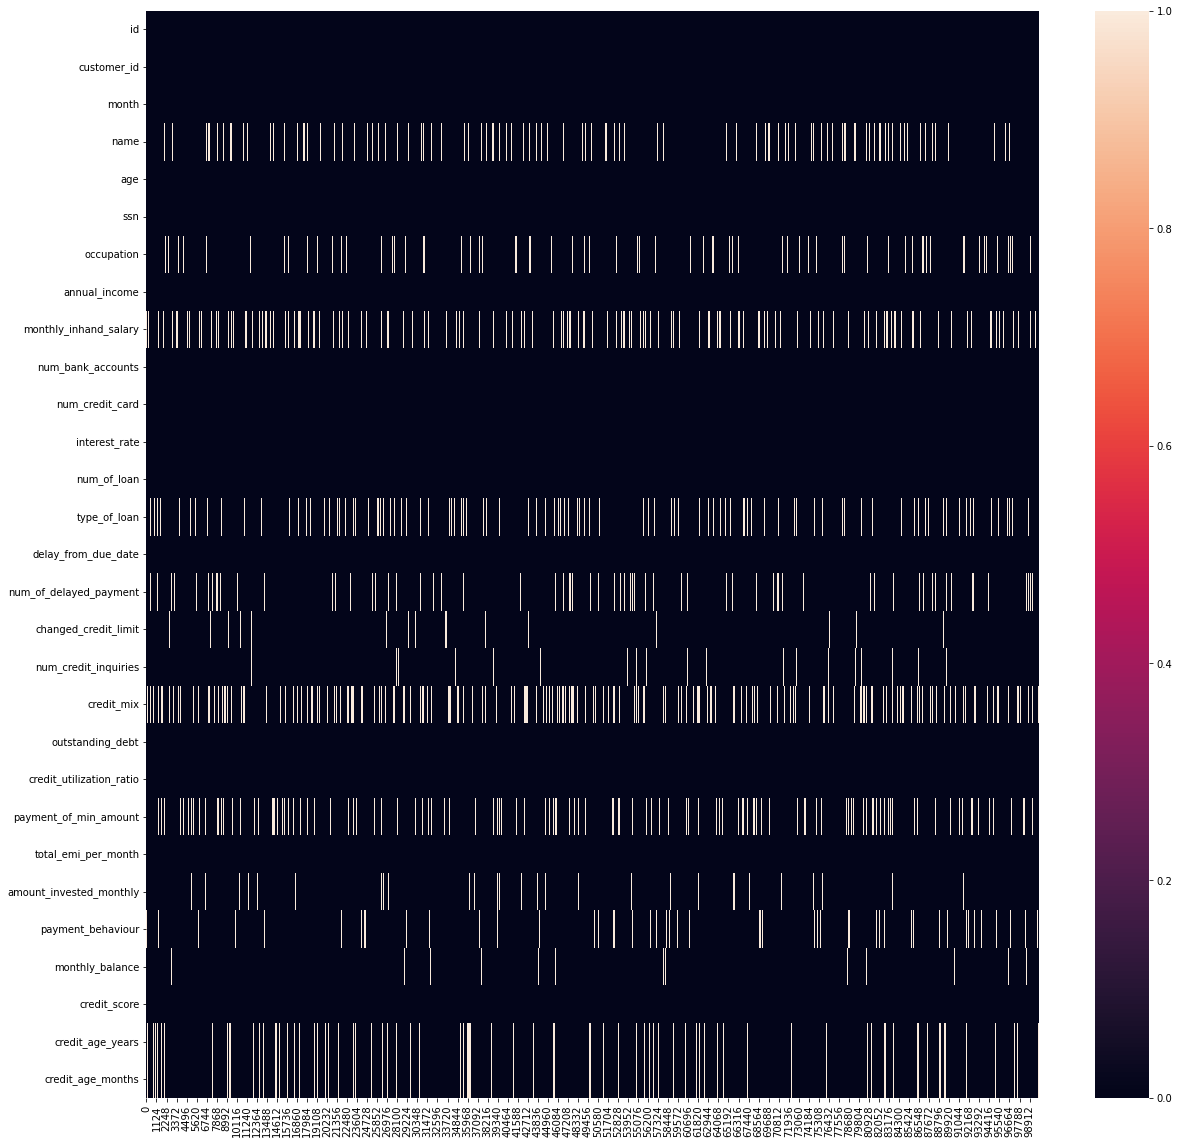

In [91]:
plt.figure(figsize=(20,20))
sns.heatmap(data.isna().T)

## numeric data

In [92]:
def random_selection_filling_missing_values(data,column_name):
    fill = data[column_name].dropna()
    test = data[column_name].fillna(pd.Series(np.random.choice(fill , size = len(data.index))))
    return test

In [93]:
def random_selection_filling_missing_values_2(data):
    for column_name in data.columns:
        if data[column_name].isna().sum() != 0:
            fill = data[column_name].dropna()
            test = data[column_name].fillna(pd.Series(np.random.choice(fill , size = len(data.index))))
            data[column_name] = test
            print(f'{column_name} has {data[column_name].isna().sum()} missing valeus')


In [94]:
def plot_two_distribution(data1,data2):
    data1.plot(kind='kde',alpha=0.9)
    data2.plot(kind='kde',alpha=0.9)
    plt.legend(['before','after'])

In [95]:
# get_sum_nan(numeric_data)

In [96]:
numeric_data = data.select_dtypes(include = ['float','int'],exclude=['object'])
numeric_data

,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,total_emi_per_month,amount_invested_monthly,monthly_balance,credit_age_years,credit_age_months
0,23,19114.12,1824.84,3,4,3,4,3,7.0,11.27,4.0,809.98,26.82,49.57,80.42,312.49,22.0,1.0
1,23,19114.12,NaN,3,4,3,4,-1,NaN,11.27,4.0,809.98,31.94,49.57,118.28,284.63,NaN,NaN
2,500,19114.12,NaN,3,4,3,4,3,7.0,NaN,4.0,809.98,28.61,49.57,81.70,331.21,22.0,3.0
3,23,19114.12,NaN,3,4,3,4,5,4.0,6.27,4.0,809.98,31.38,49.57,199.46,223.45,22.0,4.0
4,23,19114.12,1824.84,3,4,3,4,6,NaN,11.27,4.0,809.98,24.80,49.57,41.42,341.49,22.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,39628.99,3359.42,4,6,7,2,23,7.0,11.50,3.0,502.38,34.66,35.10,60.97,479.87,31.0,6.0
99996,25,39628.99,3359.42,4,6,7,2,18,7.0,11.50,3.0,502.38,40.57,35.10,54.19,496.65,31.0,7.0
99997,25,39628.99,3359.42,4,6,5729,2,27,6.0,11.50,3.0,502.38,41.26,35.10,24.03,516.81,31.0,8.0
99998,25,39628.99,3359.42,4,6,7,2,20,NaN,11.50,3.0,502.38,33.64,35.10,251.67,319.16,31.0,9.0


In [97]:
ret = get_sum_nan(numeric_data)
ret.index

Index(['monthly_inhand_salary', 'num_of_delayed_payment',
       'changed_credit_limit', 'num_credit_inquiries',
       'amount_invested_monthly', 'monthly_balance', 'credit_age_years',
       'credit_age_months'],
      dtype='object')

In [98]:
numeric_data.shape

(100000, 18)

In [99]:
# plt.figure(figsize=(20,20))
# sns.heatmap(data.isna().T)

In [100]:
numeric_data

,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,total_emi_per_month,amount_invested_monthly,monthly_balance,credit_age_years,credit_age_months
0,23,19114.12,1824.84,3,4,3,4,3,7.0,11.27,4.0,809.98,26.82,49.57,80.42,312.49,22.0,1.0
1,23,19114.12,NaN,3,4,3,4,-1,NaN,11.27,4.0,809.98,31.94,49.57,118.28,284.63,NaN,NaN
2,500,19114.12,NaN,3,4,3,4,3,7.0,NaN,4.0,809.98,28.61,49.57,81.70,331.21,22.0,3.0
3,23,19114.12,NaN,3,4,3,4,5,4.0,6.27,4.0,809.98,31.38,49.57,199.46,223.45,22.0,4.0
4,23,19114.12,1824.84,3,4,3,4,6,NaN,11.27,4.0,809.98,24.80,49.57,41.42,341.49,22.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,39628.99,3359.42,4,6,7,2,23,7.0,11.50,3.0,502.38,34.66,35.10,60.97,479.87,31.0,6.0
99996,25,39628.99,3359.42,4,6,7,2,18,7.0,11.50,3.0,502.38,40.57,35.10,54.19,496.65,31.0,7.0
99997,25,39628.99,3359.42,4,6,5729,2,27,6.0,11.50,3.0,502.38,41.26,35.10,24.03,516.81,31.0,8.0
99998,25,39628.99,3359.42,4,6,7,2,20,NaN,11.50,3.0,502.38,33.64,35.10,251.67,319.16,31.0,9.0


In [101]:
random_selection_filling_missing_values_2(numeric_data)

monthly_inhand_salary has 0 missing valeus
num_of_delayed_payment has 0 missing valeus
changed_credit_limit has 0 missing valeus
num_credit_inquiries has 0 missing valeus
amount_invested_monthly has 0 missing valeus
monthly_balance has 0 missing valeus
credit_age_years has 0 missing valeus
credit_age_months has 0 missing valeus


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [102]:
get_sum_nan(numeric_data)

Series([], dtype: int64)

In [103]:
for col in numeric_data.columns:
    data[col] = numeric_data[col]

<AxesSubplot:>

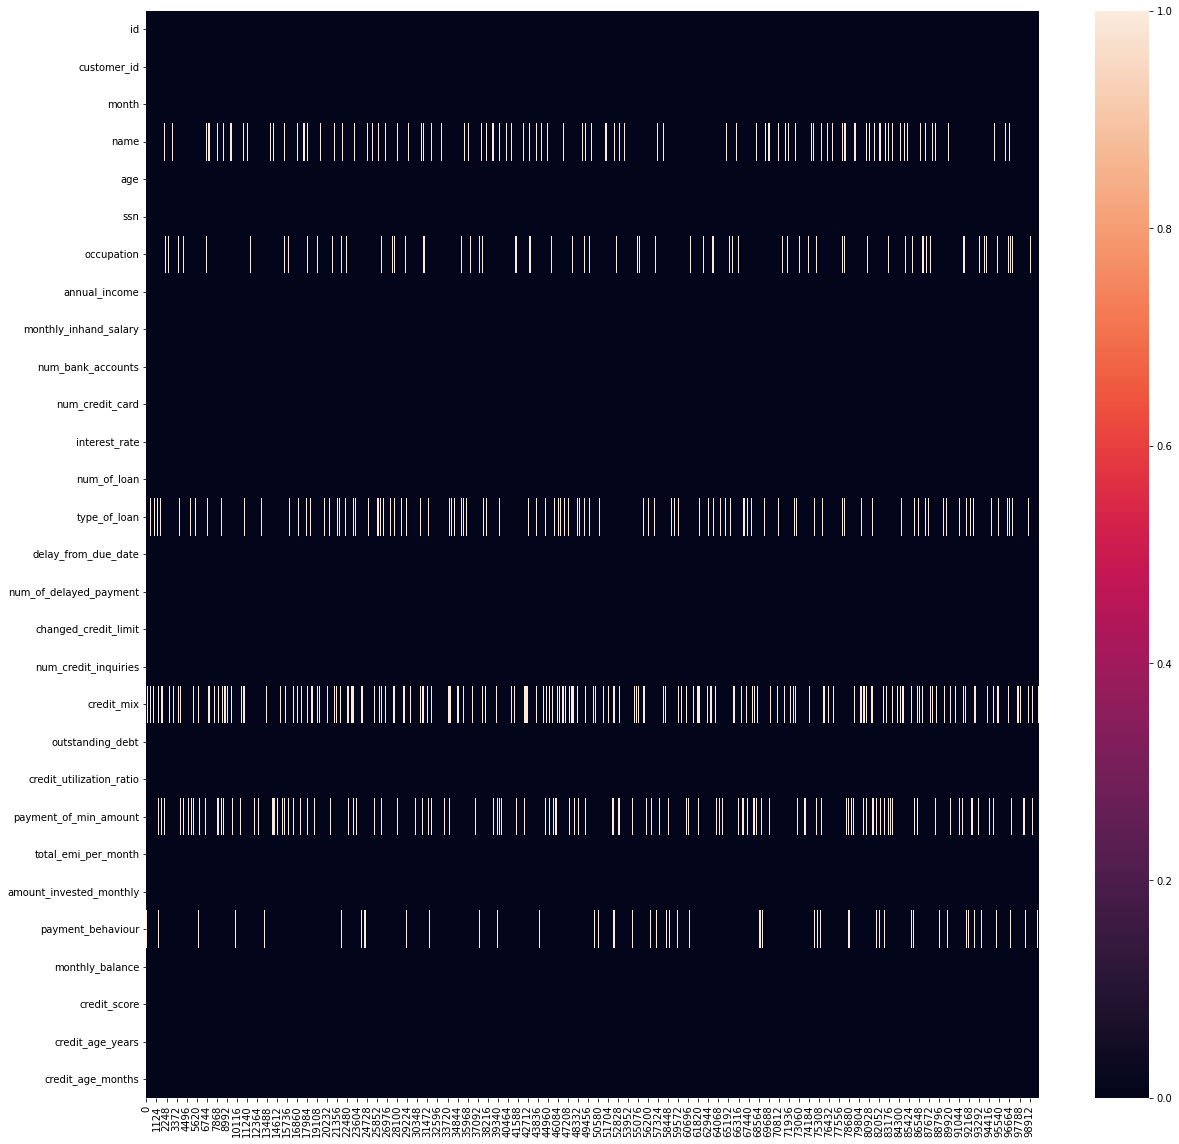

In [104]:
plt.figure(figsize=(20,20))
sns.heatmap(data.isna().T)

## Categorical data

In [105]:
def random_selection_filling_missing_values_cat(data):
    for col in data.columns:
        if data[col].isna().sum() !=0:
            fill = data[col].dropna().unique()
            test = data[col].fillna(pd.Series(np.random.choice(fill , size = len(data.index))))
            data[col] = test

In [106]:
cat_data = data.select_dtypes('object').copy()

In [107]:
cat_data

,id,customer_id,month,name,ssn,occupation,type_of_loan,credit_mix,payment_of_min_amount,payment_behaviour,credit_score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,821-00-0265,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,No,High_spent_Small_value_payments,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,821-00-0265,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Large_value_payments,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,821-00-0265,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Medium_value_payments,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,821-00-0265,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Small_value_payments,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,821-00-0265,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,High_spent_Medium_value_payments,Good
...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,078-73-5990,Mechanic,"Auto Loan, and Student Loan",NaN,No,High_spent_Large_value_payments,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,078-73-5990,Mechanic,"Auto Loan, and Student Loan",NaN,No,High_spent_Medium_value_payments,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,078-73-5990,Mechanic,"Auto Loan, and Student Loan",Good,No,High_spent_Large_value_payments,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,078-73-5990,Mechanic,"Auto Loan, and Student Loan",Good,No,Low_spent_Large_value_payments,Standard


In [108]:
get_sum_nan(cat_data)

name                      9985
occupation                7062
type_of_loan             11408
credit_mix               20195
payment_of_min_amount    12007
payment_behaviour         7600
dtype: int64

In [109]:
cat_data.drop('name',axis=1,inplace=True)

In [110]:
get_sum_nan(cat_data)

occupation                7062
type_of_loan             11408
credit_mix               20195
payment_of_min_amount    12007
payment_behaviour         7600
dtype: int64

In [111]:
random_selection_filling_missing_values_cat(cat_data)

In [112]:
get_sum_nan(cat_data)

Series([], dtype: int64)

In [113]:
for col in cat_data.columns:
    data[col] = cat_data[col]

<AxesSubplot:>

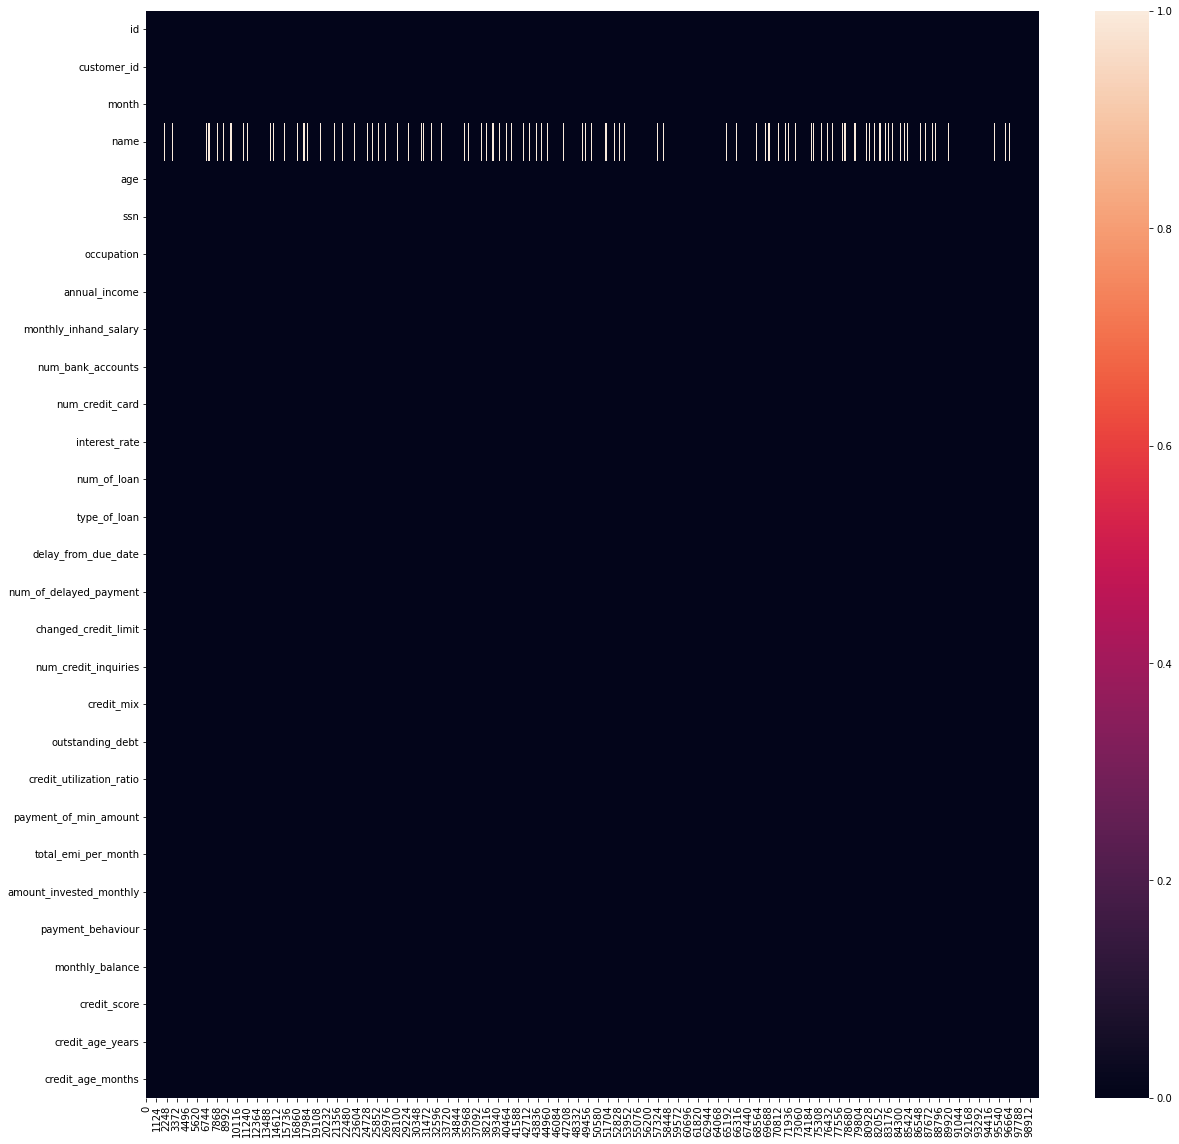

In [114]:
plt.figure(figsize=(20,20))
sns.heatmap(data.isna().T)

> for the name's col we can drop row with missing value , but it will effect our analysis on this data but really on the modelling phase this col can be discarded

In [115]:
get_sum_nan(data)

name    9985
dtype: int64

# Data Analysis

In [116]:
data

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,...,outstanding_debt,credit_utilization_ratio,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score,credit_age_years,credit_age_months
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.84,3,...,809.98,26.82,No,49.57,80.42,High_spent_Small_value_payments,312.49,Good,22.0,1.0
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,5469.90,3,...,809.98,31.94,No,49.57,118.28,Low_spent_Large_value_payments,284.63,Good,31.0,3.0
2,0x1604,CUS_0xd40,March,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,6091.41,3,...,809.98,28.61,No,49.57,81.70,Low_spent_Medium_value_payments,331.21,Good,22.0,3.0
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,7186.52,3,...,809.98,31.38,No,49.57,199.46,Low_spent_Small_value_payments,223.45,Good,22.0,4.0
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.84,3,...,809.98,24.80,No,49.57,41.42,High_spent_Medium_value_payments,341.49,Good,22.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.42,4,...,502.38,34.66,No,35.10,60.97,High_spent_Large_value_payments,479.87,Poor,31.0,6.0
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.42,4,...,502.38,40.57,No,35.10,54.19,High_spent_Medium_value_payments,496.65,Poor,31.0,7.0
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.42,4,...,502.38,41.26,No,35.10,24.03,High_spent_Large_value_payments,516.81,Poor,31.0,8.0
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.42,4,...,502.38,33.64,No,35.10,251.67,Low_spent_Large_value_payments,319.16,Standard,31.0,9.0


## numerical data summary

In [117]:
data.describe()

,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,total_emi_per_month,amount_invested_monthly,monthly_balance,credit_age_years,credit_age_months
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,119.509700,1.764157e+05,4191.282613,17.091280,22.47443,72.466040,10.761960,21.068780,30.856510,10.384766,27.671990,1426.220376,32.285184,1403.118254,638.143569,402.577024,17.963140,5.595240
std,684.757313,1.429618e+06,3180.473899,117.404834,129.05741,466.422621,61.789933,14.860104,225.269131,6.790539,192.989189,1155.129026,5.116880,8306.041264,2045.277024,213.991551,8.317015,3.447914
min,14.000000,7.005930e+03,303.650000,-1.000000,0.00000,1.000000,0.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,1.945750e+04,1625.560000,3.000000,4.00000,8.000000,2.000000,10.000000,9.000000,5.310000,3.000000,566.072500,28.050000,30.310000,74.510000,270.080000,12.000000,3.000000
50%,34.000000,3.757861e+04,3091.390000,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,1166.155000,32.310000,69.250000,135.790000,336.710000,18.000000,5.000000
75%,42.000000,7.279092e+04,5954.922500,7.000000,7.00000,20.000000,6.000000,28.000000,18.000000,14.860000,9.000000,1945.962500,36.500000,161.220000,265.812500,470.415000,25.000000,9.000000
max,8698.000000,2.419806e+07,15204.630000,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,50.000000,82331.000000,10000.000000,1602.040000,33.000000,11.000000


In [118]:
numeric_data = data.select_dtypes(['float','int'])

## distribution of each numerical feature with the target

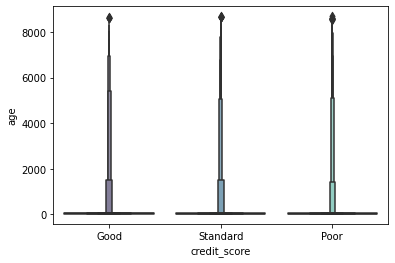

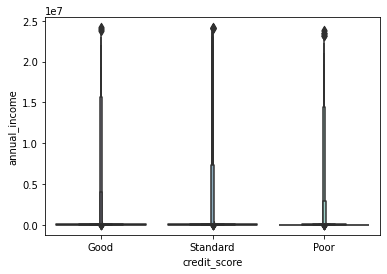

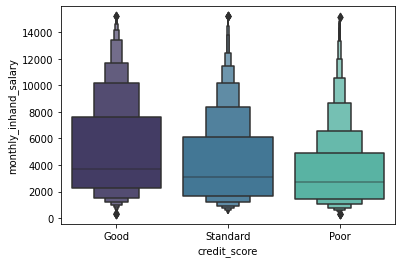

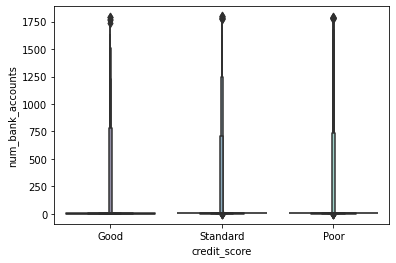

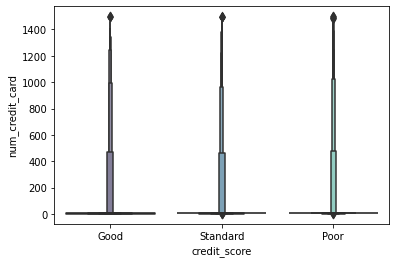

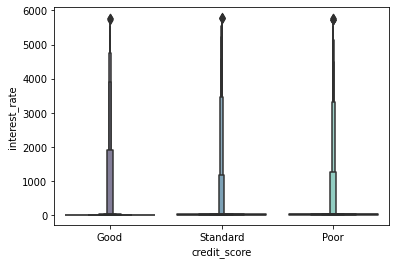

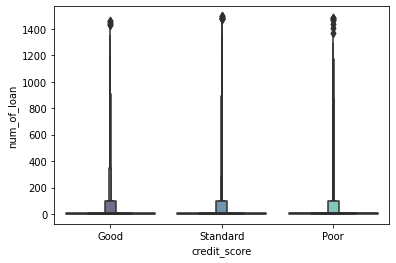

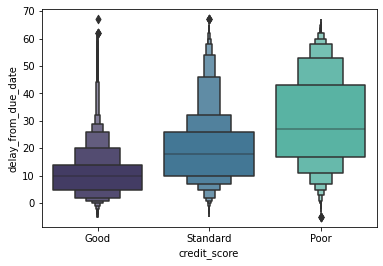

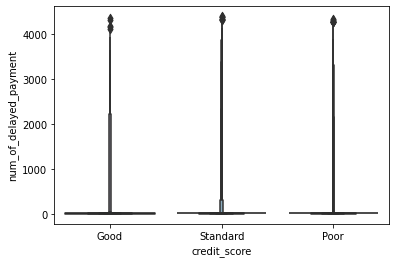

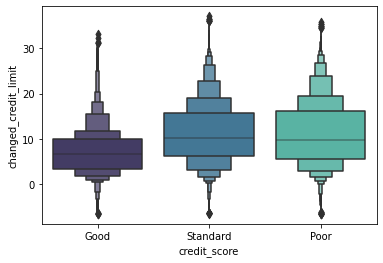

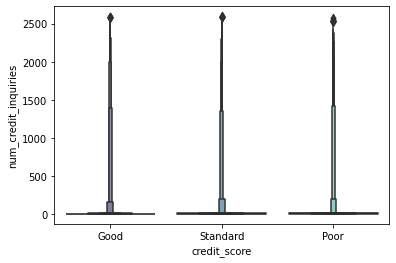

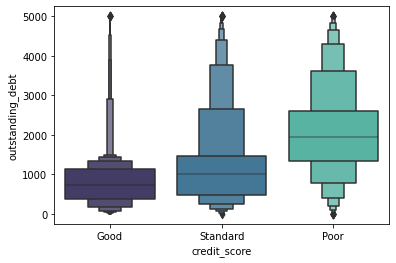

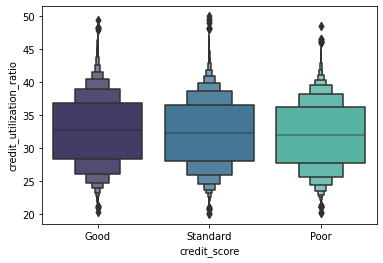

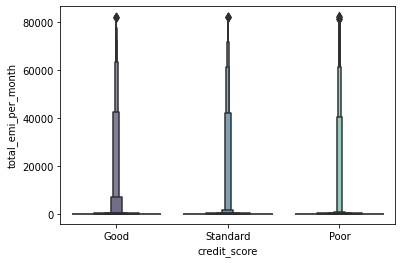

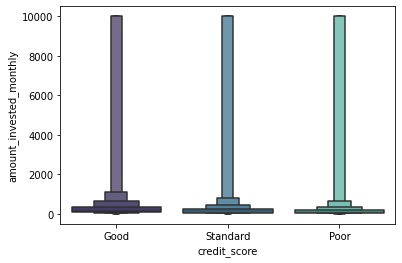

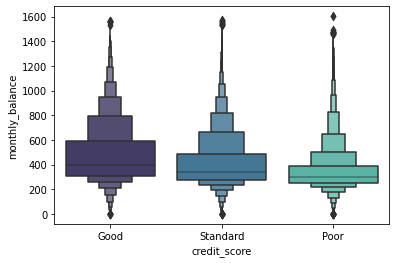

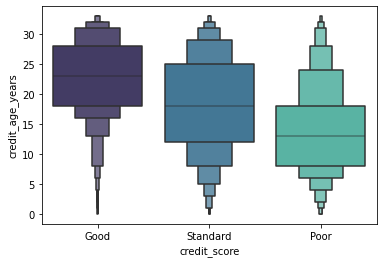

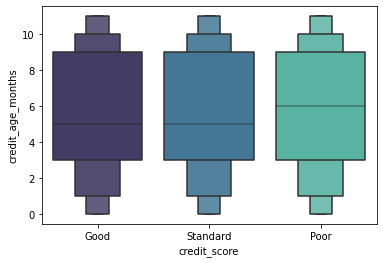

In [119]:
for col in numeric_data.columns:
    plt.figure()
    sns.boxenplot(data=data, x=data['credit_score'], y=col,palette="mako")
    plt.show()

> as we can see the distribution of all categories on our target col is likely the same for all numeric features

In [120]:
# sns.pairplot(numeric_data)

## Check correlations between features 

<Figure size 1080x1080 with 0 Axes>

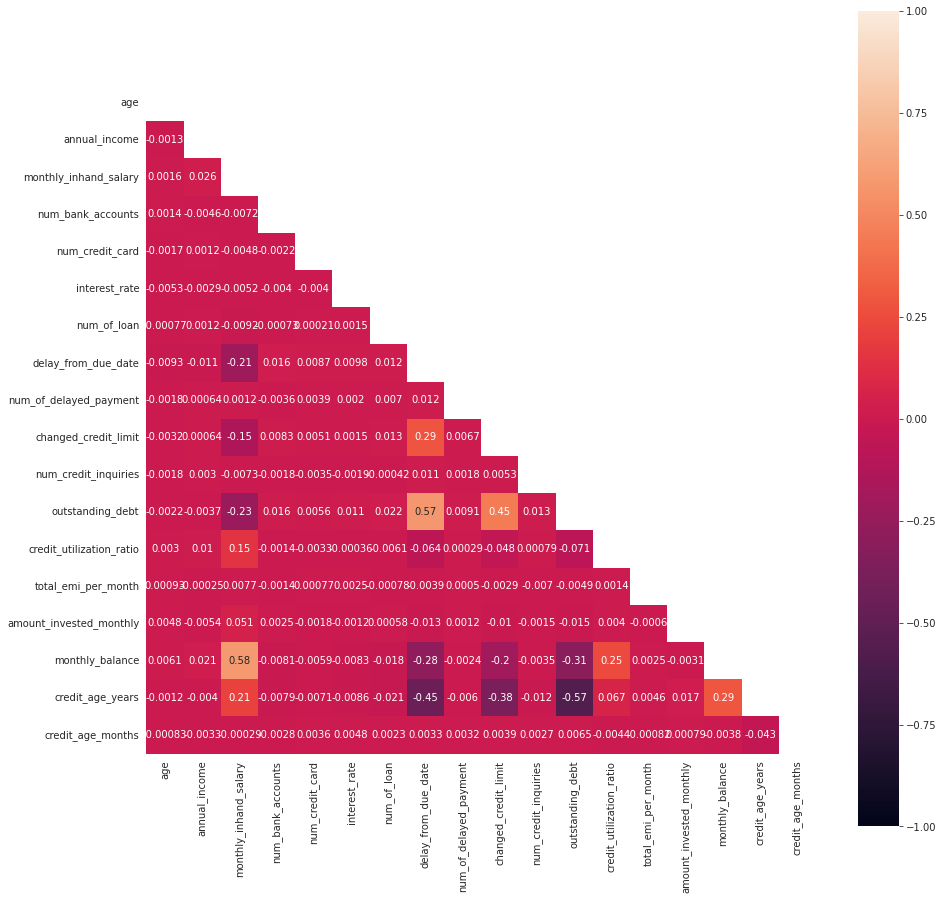

In [121]:
plt.figure(figsize=(15,15))
corr = numeric_data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr, mask=mask, vmax=1,vmin=-1, square=True,annot=True)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='monthly_balance', ylabel='monthly_inhand_salary'>

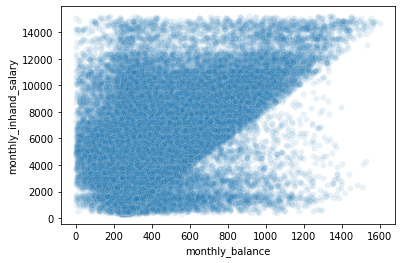

In [122]:
sns.scatterplot(data.monthly_balance,data.monthly_inhand_salary,alpha=0.1)

> there's no correlation between the numerical features

## Categorical data

In [123]:
cat_data = data.select_dtypes('object').copy()

In [124]:
cat_data.columns

Index(['id', 'customer_id', 'month', 'name', 'ssn', 'occupation',
       'type_of_loan', 'credit_mix', 'payment_of_min_amount',
       'payment_behaviour', 'credit_score'],
      dtype='object')

In [125]:
cat_data.drop(columns=['id', 'customer_id','name','ssn'],inplace=True,axis=1)

In [126]:
cat_data

,month,occupation,type_of_loan,credit_mix,payment_of_min_amount,payment_behaviour,credit_score
0,January,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Bad,No,High_spent_Small_value_payments,Good
1,February,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Large_value_payments,Good
2,March,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Medium_value_payments,Good
3,April,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Small_value_payments,Good
4,May,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,High_spent_Medium_value_payments,Good
...,...,...,...,...,...,...,...
99995,April,Mechanic,"Auto Loan, and Student Loan",Standard,No,High_spent_Large_value_payments,Poor
99996,May,Mechanic,"Auto Loan, and Student Loan",Bad,No,High_spent_Medium_value_payments,Poor
99997,June,Mechanic,"Auto Loan, and Student Loan",Good,No,High_spent_Large_value_payments,Poor
99998,July,Mechanic,"Auto Loan, and Student Loan",Good,No,Low_spent_Large_value_payments,Standard


### type_of_loan

In [127]:
loan_type_dict = dict()
for value in cat_data.type_of_loan:
    values = value.split(',')
    for each_value in values:
        loan_type = each_value.strip(' ')
        if 'and' in loan_type:
            loan_type = loan_type[4 : ]
        if loan_type in loan_type_dict:
            loan_type_dict[loan_type] += 1
        else:
            loan_type_dict[loan_type] = 1

In [128]:
loan_type_dict

{'Auto Loan': 44585,
 'Credit-Builder Loan': 47599,
 'Personal Loan': 45584,
 'Home Equity Loan': 46093,
 'Not Specified': 46517,
 'Mortgage Loan': 45860,
 'Student Loan': 45818,
 'Debt Consolidation Loan': 45644,
 'Payday Loan': 47763}

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Type_of_Loan')

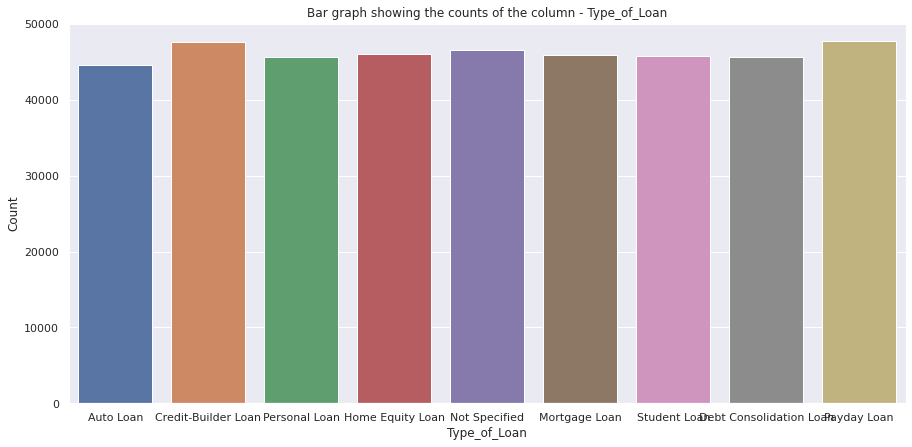

In [129]:
sns.set(rc = {'figure.figsize': (15, 7)})
sns.barplot(list(loan_type_dict.keys()), list(loan_type_dict.values()))
plt.title('Bar graph showing the counts of the column - Type_of_Loan')
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Type_of_Loan', fontsize = 12)

 > most requested loan is for (payday loanDebt) and credit-builder loan

### what is the most credit_mix that our customers got

In [130]:
credit_mix_freq = cat_data.credit_mix.value_counts()
credit_mix_freq

Standard    43181
Good        31186
Bad         25633
Name: credit_mix, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


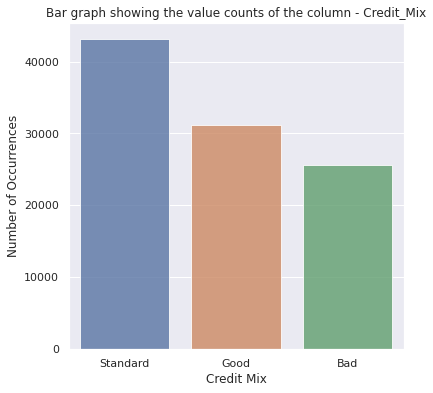

In [131]:
sns.set(rc = {'figure.figsize': (6, 6)})
sns.barplot(credit_mix_freq.index, credit_mix_freq.values, alpha = 0.8)
plt.title('Bar graph showing the value counts of the column - Credit_Mix')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Credit Mix', fontsize = 12)
plt.show()

 > we can see that most of the customers have a 'Standard' credit mix.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


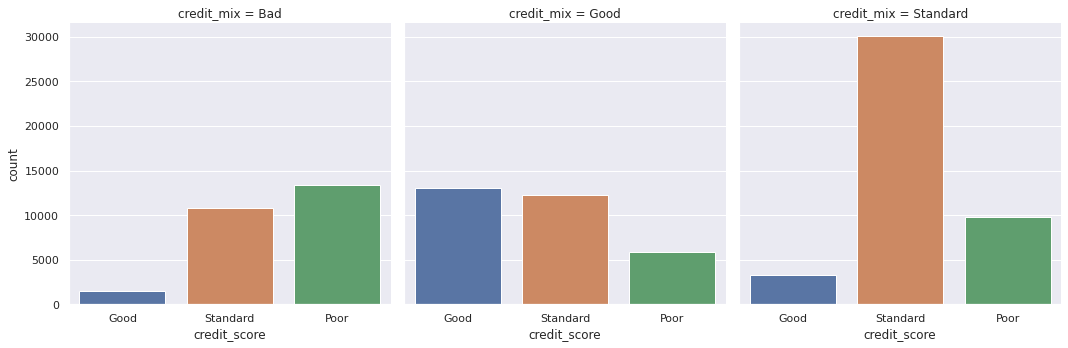

In [132]:
sns.factorplot('credit_score', col = 'credit_mix', data = data, kind = 'count', col_wrap = 3)

### percentage of costomer that paid the minimum amount?

In [133]:
cat_data.payment_of_min_amount.value_counts(normalize=True)*100

Yes    58.351
No     41.649
Name: payment_of_min_amount, dtype: float64

### what is the most behaviour of payment that our customers go with?

In [134]:
cat_data.payment_behaviour.value_counts(normalize=True)*100

Low_spent_Small_value_payments      26.740
High_spent_Medium_value_payments    18.808
Low_spent_Medium_value_payments     15.103
High_spent_Large_value_payments     14.998
High_spent_Small_value_payments     12.668
Low_spent_Large_value_payments      11.683
Name: payment_behaviour, dtype: float64

### what is our target customer's occuption?

In [135]:
cat_data.occupation.value_counts(normalize=True)*100

Lawyer           7.028
Architect        6.895
Engineer         6.784
Scientist        6.777
Mechanic         6.768
Accountant       6.734
Developer        6.717
Media_Manager    6.705
Teacher          6.699
Entrepreneur     6.653
Doctor           6.564
Journalist       6.546
Manager          6.425
Writer           6.356
Musician         6.349
Name: occupation, dtype: float64

> as we can see we have almost the same percentage of all customers' occuptions. we are targeting all of them 

### what is the most likely month that the bank will get payments in?

In [136]:
cat_data.month.value_counts(normalize=True)*100

January     12.5
February    12.5
March       12.5
April       12.5
May         12.5
June        12.5
July        12.5
August      12.5
Name: month, dtype: float64

> almost the same 

In [137]:
month_gp = data.groupby('month')

In [138]:
(month_gp['payment_of_min_amount'].value_counts(normalize=True)*100)

month     payment_of_min_amount
April     Yes                      58.488
          No                       41.512
August    Yes                      58.416
          No                       41.584
February  Yes                      58.528
          No                       41.472
January   Yes                      58.432
          No                       41.568
July      Yes                      58.080
          No                       41.920
June      Yes                      58.256
          No                       41.744
March     Yes                      58.568
          No                       41.432
May       Yes                      58.040
          No                       41.960
Name: payment_of_min_amount, dtype: float64

### highest monthly balance on each month

In [139]:
month_gp.monthly_balance.max().sort_values(ascending=False)

month
January     1602.04
April       1576.29
June        1566.61
July        1564.13
February    1558.42
May         1555.20
March       1542.27
August      1463.79
Name: monthly_balance, dtype: float64

### the average monthly balance on each month

In [140]:
month_gp.monthly_balance.mean().sort_values(ascending=False)

month
January     405.833601
August      403.544334
April       403.283822
March       402.111229
June        401.701442
July        401.594429
February    401.535201
May         401.012136
Name: monthly_balance, dtype: float64

# Outliers

In [141]:
data.columns

Index(['id', 'customer_id', 'month', 'name', 'age', 'ssn', 'occupation',
       'annual_income', 'monthly_inhand_salary', 'num_bank_accounts',
       'num_credit_card', 'interest_rate', 'num_of_loan', 'type_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'credit_mix', 'outstanding_debt',
       'credit_utilization_ratio', 'payment_of_min_amount',
       'total_emi_per_month', 'amount_invested_monthly', 'payment_behaviour',
       'monthly_balance', 'credit_score', 'credit_age_years',
       'credit_age_months'],
      dtype='object')

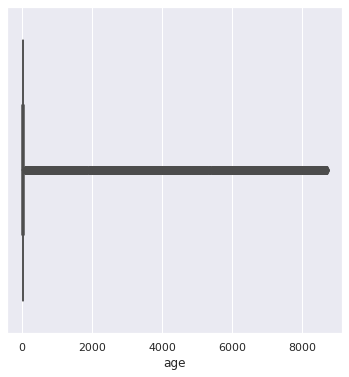

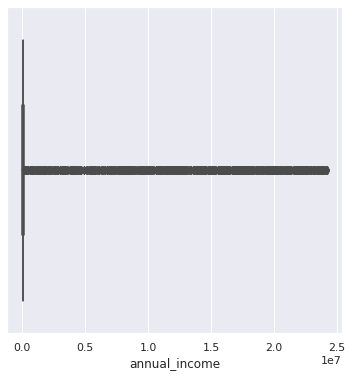

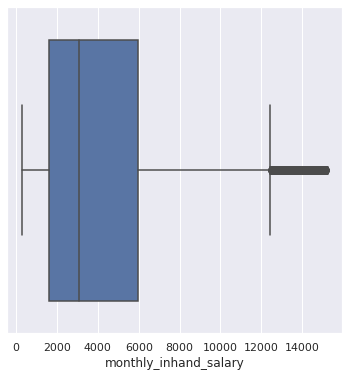

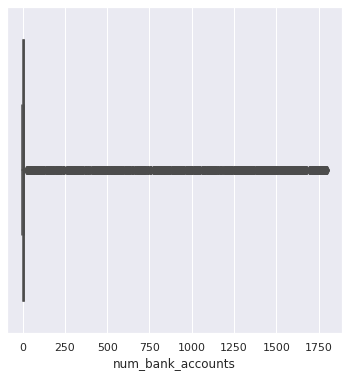

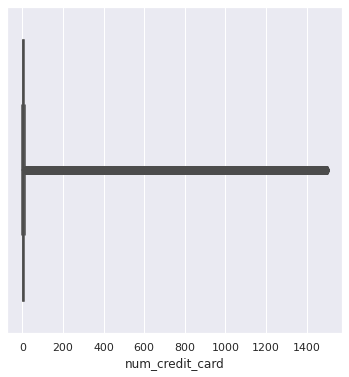

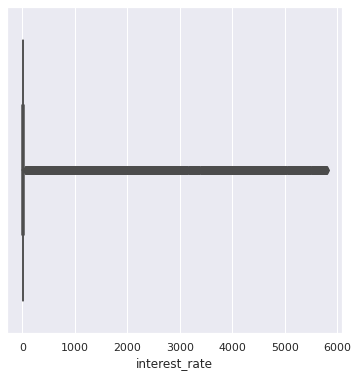

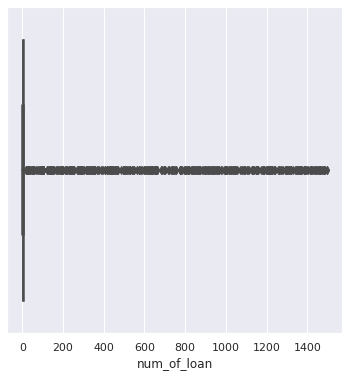

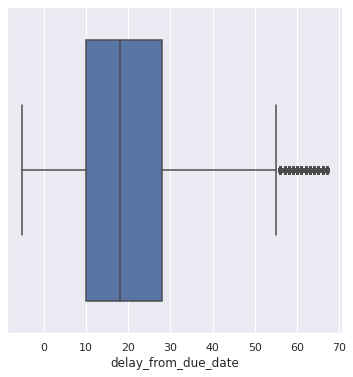

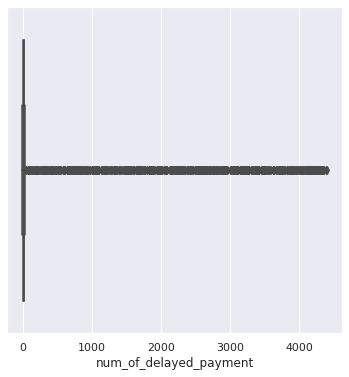

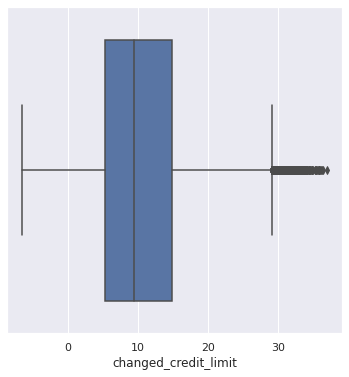

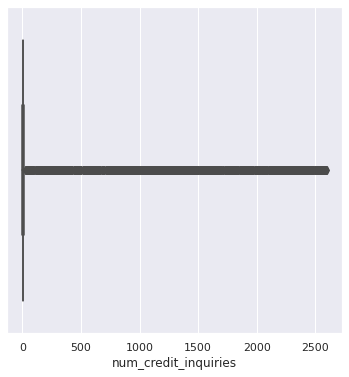

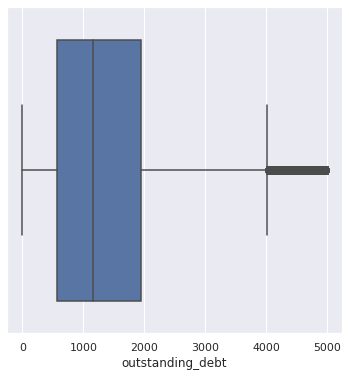

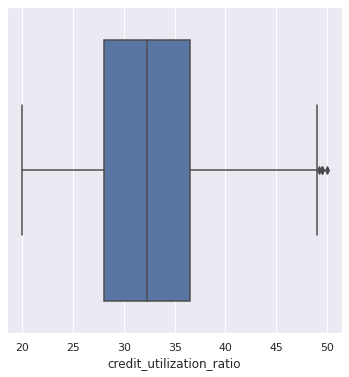

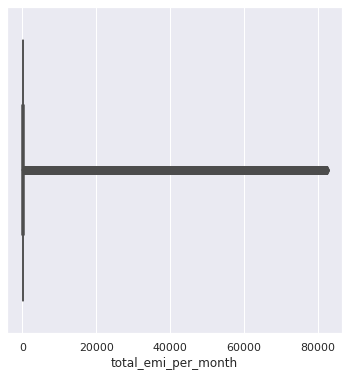

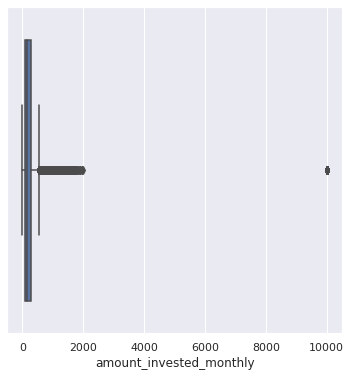

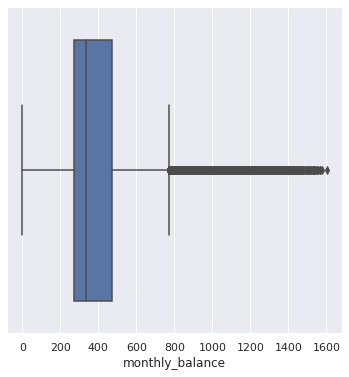

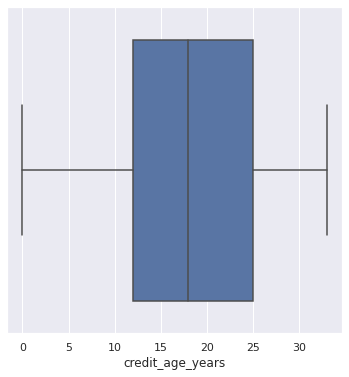

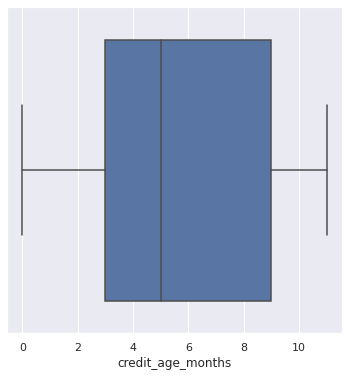

In [142]:
for col in numeric_data.columns:
    plt.figure()
    sns.boxplot(x=numeric_data[col])
    plt.show()

### usign IQR techique

In [143]:
from collections import Counter
def detect_outliers(df, n, features_list):
    outlier_indices = [] 
    for feature in features_list: 
        Q1 = np.percentile(df[feature], 25)
        Q3 = np.percentile(df[feature], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[feature] < Q1 - outlier_step) | (df[feature] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

numerical_columns = list(numeric_data.columns)
print('Numerical columns: {}'.format(numerical_columns))
outliers_to_drop = detect_outliers(data, 2, numerical_columns)
print("We will drop {} indices: ".format(len(outliers_to_drop)))

Numerical columns: ['age', 'annual_income', 'monthly_inhand_salary', 'num_bank_accounts', 'num_credit_card', 'interest_rate', 'num_of_loan', 'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit', 'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio', 'total_emi_per_month', 'amount_invested_monthly', 'monthly_balance', 'credit_age_years', 'credit_age_months']
We will drop 2764 indices: 


In [144]:
data.iloc[outliers_to_drop,:]

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,...,outstanding_debt,credit_utilization_ratio,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score,credit_age_years,credit_age_months
920,0x1b66,CUS_0x7caf,January,Rl,3169,628-85-7991,Architect,147499.60,12353.63,2,...,1250.67,42.25,No,192.21,10000.00,High_spent_Small_value_payments,1041.08,Standard,20.0,3.0
1293,0x1d93,CUS_0xb9ea,June,Aileen Wangy,2744,202-04-9323,Writer,9133.04,1769.53,6,...,3035.88,36.67,Yes,77767.00,48.45,Low_spent_Medium_value_payments,269.05,Good,9.0,4.0
1656,0x1fb6,CUS_0x8208,January,Jonathan Spicers,500,084-02-0981,Teacher,94454.10,8102.18,1,...,1342.61,26.06,No,152.51,10000.00,High_spent_Medium_value_payments,719.69,Good,29.0,9.0
2459,0x2469,CUS_0x86b,April,Paulr,500,372-37-8955,Engineer,69692.16,6034.68,9,...,2128.87,26.75,Yes,395.88,10000.00,High_spent_Medium_value_payments,258.13,Poor,13.0,0.0
2902,0x2700,CUS_0x67ff,July,Barlyni,7992,017-88-1687,Manager,82700.32,6625.69,8,...,4659.60,39.95,Yes,392.11,10000.00,High_spent_Medium_value_payments,372.27,Poor,12.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92782,0x235a4,CUS_0x7f2a,July,Finkleu,44,971-11-8511,Engineer,106141.53,7942.70,4,...,532.22,34.49,No,1079.88,591.32,High_spent_Large_value_payments,835.46,Good,18.0,5.0
92808,0x235ce,CUS_0xa650,January,ers,41,001-30-8624,Scientist,81887.80,2044.63,5,...,1882.85,28.60,Yes,407.48,609.26,Low_spent_Small_value_payments,901.29,Poor,16.0,4.0
96884,0x24dae,CUS_0x88fd,May,Sophie Sassardn,52,773-09-9216,Writer,105842.96,9094.25,7,...,303.24,31.05,No,63123.00,10000.00,High_spent_Large_value_payments,795.49,Standard,18.0,8.0
98070,0x254a0,CUS_0x7813,July,Karenm,26,095-39-4425,Lawyer,80094.96,1171.67,7,...,2286.06,23.35,Yes,923.61,629.29,Low_spent_Medium_value_payments,1115.24,Standard,8.0,4.0


In [145]:
## we will drop these rows
print(f'num. of rows before dropping: {data.shape[0]}')
data = data.drop(index=outliers_to_drop).reset_index(drop = True)
print(f'num. of rows after dropping: {data.shape[0]}')

num. of rows before dropping: 100000
num. of rows after dropping: 97236


### drop columns

In [146]:
data.columns

Index(['id', 'customer_id', 'month', 'name', 'age', 'ssn', 'occupation',
       'annual_income', 'monthly_inhand_salary', 'num_bank_accounts',
       'num_credit_card', 'interest_rate', 'num_of_loan', 'type_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'credit_mix', 'outstanding_debt',
       'credit_utilization_ratio', 'payment_of_min_amount',
       'total_emi_per_month', 'amount_invested_monthly', 'payment_behaviour',
       'monthly_balance', 'credit_score', 'credit_age_years',
       'credit_age_months'],
      dtype='object')

In [147]:
data.drop(['id', 'customer_id','name','ssn','credit_mix','credit_utilization_ratio'],inplace=True,axis=1)

In [148]:
data.drop(['payment_behaviour','num_bank_accounts', 'num_credit_card'],inplace=True,axis=1)

In [149]:
data.head()

,month,age,occupation,annual_income,monthly_inhand_salary,interest_rate,num_of_loan,type_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,monthly_balance,credit_score,credit_age_years,credit_age_months
0,January,23,Scientist,19114.12,1824.84,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.27,4.0,809.98,No,49.57,80.42,312.49,Good,22.0,1.0
1,February,23,Scientist,19114.12,5469.90,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,12.0,11.27,4.0,809.98,No,49.57,118.28,284.63,Good,31.0,3.0
2,March,500,Scientist,19114.12,6091.41,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.92,4.0,809.98,No,49.57,81.70,331.21,Good,22.0,3.0
3,April,23,Scientist,19114.12,7186.52,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.27,4.0,809.98,No,49.57,199.46,223.45,Good,22.0,4.0
4,May,23,Scientist,19114.12,1824.84,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,15.0,11.27,4.0,809.98,No,49.57,41.42,341.49,Good,22.0,5.0


# Feature Engineering

creating dummi columns from the loan_type's col 

In [150]:
loan_type_dict

{'Auto Loan': 44585,
 'Credit-Builder Loan': 47599,
 'Personal Loan': 45584,
 'Home Equity Loan': 46093,
 'Not Specified': 46517,
 'Mortgage Loan': 45860,
 'Student Loan': 45818,
 'Debt Consolidation Loan': 45644,
 'Payday Loan': 47763}

In [151]:
auto_loan = [0] * (len(data))
credit_builder_loan = [0] * (len(data))
personal_loan = [0] * (len(data))
home_equity_loan = [0] * (len(data))
mortgage_loan = [0] * (len(data))
student_loan = [0] * (len(data))
debt_consolidation_loan = [0] * (len(data))
payday_loan = [0] * (len(data))

In [152]:
len(auto_loan)
auto_loan[10]

0

In [153]:
for index in range(len(data.type_of_loan)):
    if 'Auto Loan' in data.type_of_loan[index]:
        auto_loan[index] = 1
        
    if 'Credit-Builder Loan' in data.type_of_loan[index]:
        credit_builder_loan[index] = 1
        
    if 'Personal Loan' in data.type_of_loan[index]:
        personal_loan[index] = 1
        
    if 'Home Equity Loan' in data.type_of_loan[index]:
        home_equity_loan[index] = 1
        
    if 'Payday Loan' in data.type_of_loan[index]:
        payday_loan[index] = 1
        
    if 'Mortgage Loan' in data.type_of_loan[index]:
        mortgage_loan[index] = 1
        
    if 'Student Loan' in data.type_of_loan[index]:
        student_loan[index] = 1
    
    if 'Debt Consolidation Loan' in data.type_of_loan[index]:
        debt_consolidation_loan[index] = 1
    

In [154]:
data['auto_loan'] = auto_loan  
data['credit_builder_loan']=credit_builder_loan  
data['personal_loan']=personal_loan 
data['home_equity_loan']=home_equity_loan 
data['mortgage_loan']=mortgage_loan
data['student_loan']=student_loan
data['debt_consolidation_loan']=debt_consolidation_loan 
data['payday_loan']=payday_loan 

In [155]:
data

,month,age,occupation,annual_income,monthly_inhand_salary,interest_rate,num_of_loan,type_of_loan,delay_from_due_date,num_of_delayed_payment,...,credit_age_years,credit_age_months,auto_loan,credit_builder_loan,personal_loan,home_equity_loan,mortgage_loan,student_loan,debt_consolidation_loan,payday_loan
0,January,23,Scientist,19114.12,1824.84,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,...,22.0,1.0,1,1,1,1,0,0,0,0
1,February,23,Scientist,19114.12,5469.90,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,12.0,...,31.0,3.0,1,1,1,1,0,0,0,0
2,March,500,Scientist,19114.12,6091.41,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,...,22.0,3.0,1,1,1,1,0,0,0,0
3,April,23,Scientist,19114.12,7186.52,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,...,22.0,4.0,1,1,1,1,0,0,0,0
4,May,23,Scientist,19114.12,1824.84,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,15.0,...,22.0,5.0,1,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97231,April,25,Mechanic,39628.99,3359.42,7,2,"Auto Loan, and Student Loan",23,7.0,...,31.0,6.0,1,0,0,0,0,1,0,0
97232,May,25,Mechanic,39628.99,3359.42,7,2,"Auto Loan, and Student Loan",18,7.0,...,31.0,7.0,1,0,0,0,0,1,0,0
97233,June,25,Mechanic,39628.99,3359.42,5729,2,"Auto Loan, and Student Loan",27,6.0,...,31.0,8.0,1,0,0,0,0,1,0,0
97234,July,25,Mechanic,39628.99,3359.42,7,2,"Auto Loan, and Student Loan",20,4.0,...,31.0,9.0,1,0,0,0,0,1,0,0


In [156]:
data.drop('type_of_loan',inplace=True,axis=1)

In [157]:
len(data.columns)

27

In [158]:
cat_data = data.select_dtypes('object').copy()

In [159]:
cat_data.drop('credit_score',axis=1,inplace=True)

In [160]:
cat_data

,month,occupation,payment_of_min_amount
0,January,Scientist,No
1,February,Scientist,No
2,March,Scientist,No
3,April,Scientist,No
4,May,Scientist,No
...,...,...,...
97231,April,Mechanic,No
97232,May,Mechanic,No
97233,June,Mechanic,No
97234,July,Mechanic,No


# Feature Encoding 

### using one Hot encoding for categorical feature

In [161]:
data_encoded  = pd.get_dummies(data=data,columns=['month','occupation','payment_of_min_amount'])

In [162]:
data_encoded

,age,annual_income,monthly_inhand_salary,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,...,occupation_Lawyer,occupation_Manager,occupation_Mechanic,occupation_Media_Manager,occupation_Musician,occupation_Scientist,occupation_Teacher,occupation_Writer,payment_of_min_amount_No,payment_of_min_amount_Yes
0,23,19114.12,1824.84,3,4,3,7.0,11.27,4.0,809.98,...,0,0,0,0,0,1,0,0,1,0
1,23,19114.12,5469.90,3,4,-1,12.0,11.27,4.0,809.98,...,0,0,0,0,0,1,0,0,1,0
2,500,19114.12,6091.41,3,4,3,7.0,11.92,4.0,809.98,...,0,0,0,0,0,1,0,0,1,0
3,23,19114.12,7186.52,3,4,5,4.0,6.27,4.0,809.98,...,0,0,0,0,0,1,0,0,1,0
4,23,19114.12,1824.84,3,4,6,15.0,11.27,4.0,809.98,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97231,25,39628.99,3359.42,7,2,23,7.0,11.50,3.0,502.38,...,0,0,1,0,0,0,0,0,1,0
97232,25,39628.99,3359.42,7,2,18,7.0,11.50,3.0,502.38,...,0,0,1,0,0,0,0,0,1,0
97233,25,39628.99,3359.42,5729,2,27,6.0,11.50,3.0,502.38,...,0,0,1,0,0,0,0,0,1,0
97234,25,39628.99,3359.42,7,2,20,4.0,11.50,3.0,502.38,...,0,0,1,0,0,0,0,0,1,0


In [163]:
casting = data_encoded.select_dtypes('uint8').columns

In [164]:
casting

Index(['month_April', 'month_August', 'month_February', 'month_January',
       'month_July', 'month_June', 'month_March', 'month_May',
       'occupation_Accountant', 'occupation_Architect', 'occupation_Developer',
       'occupation_Doctor', 'occupation_Engineer', 'occupation_Entrepreneur',
       'occupation_Journalist', 'occupation_Lawyer', 'occupation_Manager',
       'occupation_Mechanic', 'occupation_Media_Manager',
       'occupation_Musician', 'occupation_Scientist', 'occupation_Teacher',
       'occupation_Writer', 'payment_of_min_amount_No',
       'payment_of_min_amount_Yes'],
      dtype='object')

In [165]:
for col in casting:
    data_encoded[col] = data_encoded[col].astype(np.int64)

In [166]:
data_encoded.dtypes

age                            int64
annual_income                float64
monthly_inhand_salary        float64
interest_rate                  int64
num_of_loan                    int64
delay_from_due_date            int64
num_of_delayed_payment       float64
changed_credit_limit         float64
num_credit_inquiries         float64
outstanding_debt             float64
total_emi_per_month          float64
amount_invested_monthly      float64
monthly_balance              float64
credit_score                  object
credit_age_years             float64
credit_age_months            float64
auto_loan                      int64
credit_builder_loan            int64
personal_loan                  int64
home_equity_loan               int64
mortgage_loan                  int64
student_loan                   int64
debt_consolidation_loan        int64
payday_loan                    int64
month_April                    int64
month_August                   int64
month_February                 int64
m

In [167]:
data_encoded.age  =data_encoded.age.astype(np.int64)


### encoding the target using labelEncoder 

In [168]:
from sklearn.preprocessing import LabelEncoder

In [169]:
label_encoder = LabelEncoder()

In [170]:
data_encoded.credit_score = label_encoder.fit_transform(data_encoded.credit_score)

In [171]:
data_encoded.dtypes

age                            int64
annual_income                float64
monthly_inhand_salary        float64
interest_rate                  int64
num_of_loan                    int64
delay_from_due_date            int64
num_of_delayed_payment       float64
changed_credit_limit         float64
num_credit_inquiries         float64
outstanding_debt             float64
total_emi_per_month          float64
amount_invested_monthly      float64
monthly_balance              float64
credit_score                   int64
credit_age_years             float64
credit_age_months            float64
auto_loan                      int64
credit_builder_loan            int64
personal_loan                  int64
home_equity_loan               int64
mortgage_loan                  int64
student_loan                   int64
debt_consolidation_loan        int64
payday_loan                    int64
month_April                    int64
month_August                   int64
month_February                 int64
m

In [172]:
data_encoded.credit_score =data_encoded.credit_score.astype(np.int64)

In [173]:
label_encoder.classes_

array(['Good', 'Poor', 'Standard'], dtype=object)

# Modelling

In [174]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score

In [175]:
X = data_encoded.drop('credit_score',axis=1).values
Y = data_encoded['credit_score'].values
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [176]:
print(f'x_train {x_train.shape}')
print(f'y_train {y_train.shape}')
print(f'x_test  {x_test.shape}')
print(f'y_test  {x_test.shape}')


x_train (72927, 48)
y_train (72927,)
x_test  (24309, 48)
y_test  (24309, 48)


In [177]:
def get_confusion_matrix_df(cm):
    cm_array = np.array(cm)
    df_cm = pd.DataFrame(cm_array,columns=['Predict Good','Predict Poor','Predict Standard'])
    df_cm.rename(index={0:'Actual Good',1:'Actual Poor',2:'Actual Standart'})
    return df_cm

## Logistic Regression

In [178]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing

import statsmodels.api as sm

In [179]:
lg = LogisticRegression(max_iter=10000)

In [180]:
lg.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [181]:
log_score = lg.score(x_train,y_train)

In [182]:
Y_pred  = lg.predict(x_test)

In [183]:
cm = confusion_matrix(y_pred=Y_pred,y_true=y_test)

In [184]:
label_encoder.classes_

array(['Good', 'Poor', 'Standard'], dtype=object)

In [185]:
cm_array = np.array(cm)

In [186]:
cm_array

array([[   30,    88,  4049],
       [    7,  2444,  4662],
       [   78,  1997, 10954]])

In [187]:
df_cm = pd.DataFrame(cm_array,columns=['Predict Good','Predict Poor','Predict Standard'])
df_cm.rename(index={0:'Actual Good',1:'Actual Poor',2:'Actual Standart'})

,Predict Good,Predict Poor,Predict Standard
Actual Good,30,88,4049
Actual Poor,7,2444,4662
Actual Standart,78,1997,10954


In [188]:
precision = round(precision_score(y_test,Y_pred, average = 'weighted')*100,2)
print(f'Accuracy of Logistic Model: {accuracy_score(y_pred=Y_pred,y_true=y_test)*100:.2f}%')
print(f'precision of Logistic Model: {precision}%')

Accuracy of Logistic Model: 55.24%
precision of Logistic Model: 50.12%


In [189]:
Logistic_reg_accuracy = round(accuracy_score(y_pred=Y_pred,y_true=y_test)*100,2)

In [190]:
models = {'Logistic Reggression':[Logistic_reg_accuracy,precision]}

## KNN

### K=15

In [191]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(15)
KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [192]:
y_pred = KNN.predict(x_test)

In [193]:
cm = confusion_matrix(y_pred=y_pred,y_true=y_test)

In [194]:
get_confusion_matrix_df(cm)

,Predict Good,Predict Poor,Predict Standard
0,1070,224,2873
1,321,4225,2567
2,1021,2211,9797


In [195]:
precision_knn_15 = round(precision_score(y_test,y_pred, average = 'weighted')*100,2)
accuracy_knn_15 = round(accuracy_score(y_pred=y_pred,y_true=y_test)*100,2)
print(f'Accuracy of KKN Model: {accuracy_knn_15}%')
print(f'precision of KNN Model: {precision_knn_15}%')

Accuracy of KKN Model: 62.08%
precision of KNN Model: 60.63%


In [196]:
models['KNN 15'] = [accuracy_knn_15,precision_knn_15]

### K=6

In [197]:
KNN2 = KNeighborsClassifier(6)
KNN2.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=6)

In [198]:
y_pred = KNN2.predict(x_test)

In [199]:
cm = confusion_matrix(y_pred=y_pred,y_true=y_test)

In [200]:
get_confusion_matrix_df(cm)

,Predict Good,Predict Poor,Predict Standard
0,2009,214,1944
1,422,4927,1764
2,1831,2395,8803


In [201]:
precision_knn_6 = round(precision_score(y_test,y_pred, average = 'weighted')*100,2)
accuracy_knn_6 = round(accuracy_score(y_pred=y_pred,y_true=y_test)*100,2)
print(f'Accuracy of KNN Model: {accuracy_knn_6}%')
print(f'precision of KNN Model: {precision_knn_6}%')

Accuracy of KNN Model: 64.75%
precision of KNN Model: 64.92%


In [202]:
models['KNN 6'] = [accuracy_knn_6,precision_knn_6]

### K=2

In [203]:
KNN3 = KNeighborsClassifier(2)
KNN3.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=2)

In [204]:
y_pred = KNN3.predict(x_test)

In [205]:
cm = confusion_matrix(y_pred=y_pred,y_true=y_test)

In [206]:
get_confusion_matrix_df(cm)

,Predict Good,Predict Poor,Predict Standard
0,2961,307,899
1,523,5707,883
2,2702,3054,7273


In [207]:
precision_knn_2 = round(precision_score(y_test,y_pred, average = 'weighted')*100,2)
accuracy_knn_2 = round(accuracy_score(y_pred=y_pred,y_true=y_test)*100,2)
print(f'Accuracy of KNN Model: {accuracy_knn_2}%')
print(f'precision of KNN Model: {precision_knn_2}%')

Accuracy of KNN Model: 65.58%
precision of KNN Model: 69.67%


In [208]:
models['KNN 2'] = [accuracy_knn_2,precision_knn_2]

### K=1

In [209]:
KNN4 = KNeighborsClassifier(1)
KNN4.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=1)

In [210]:
y_pred = KNN4.predict(x_test)

In [211]:
cm = confusion_matrix(y_pred=y_pred,y_true=y_test)

In [212]:
get_confusion_matrix_df(cm)

,Predict Good,Predict Poor,Predict Standard
0,2314,209,1644
1,230,4835,2048
2,1560,2102,9367


In [213]:
precision_knn_1 = round(precision_score(y_test,y_pred, average = 'weighted')*100,2)
accuracy_knn_1 = round(accuracy_score(y_pred=y_pred,y_true=y_test)*100,2)
print(f'Accuracy of KNN Model: {accuracy_knn_1}%')
print(f'precision of KNN Model: {precision_knn_1}%')

Accuracy of KNN Model: 67.94%
precision of KNN Model: 67.91%


In [214]:
models['KNN 1'] = [accuracy_knn_1,precision_knn_1]

## Decision Tree

In [215]:
from sklearn.tree import DecisionTreeClassifier

In [216]:
dt = DecisionTreeClassifier(max_depth=1000,max_features = x_train.shape[1],random_state=42)

In [217]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=1000, max_features=48, random_state=42)

In [218]:
y_pred = dt.predict(x_test)

In [219]:
cm = confusion_matrix(y_pred=y_pred,y_true=y_test)

In [220]:
get_confusion_matrix_df(cm)

,Predict Good,Predict Poor,Predict Standard
0,2385,270,1512
1,249,4756,2108
2,1575,2028,9426


In [221]:
Decision_tree_precision = round(precision_score(y_test,y_pred, average = 'weighted')*100,2)
Decision_tree_score = round(accuracy_score(y_pred=y_pred,y_true=y_test)*100,2)
print(f'Accuracy of DT Model: {Decision_tree_score}%')
print(f'precision of DT Model: {Decision_tree_precision}%')

Accuracy of DT Model: 68.15%
precision of DT Model: 68.17%


In [222]:
models['Decision_tree'] = [Decision_tree_score,Decision_tree_precision]

## RandomForest

In [223]:
from sklearn.ensemble import RandomForestClassifier

### n_estimators=25

In [224]:
rand1 = RandomForestClassifier(n_estimators=25,random_state=42,max_features=x_train.shape[1],max_depth=1000)

In [225]:
rand1.fit(x_train,y_train)

RandomForestClassifier(max_depth=1000, max_features=48, n_estimators=25,
                       random_state=42)

In [226]:
y_pred = rand1.predict(x_test)

In [227]:
cm = confusion_matrix(y_pred=y_pred,y_true=y_test)

In [228]:
get_confusion_matrix_df(cm)

,Predict Good,Predict Poor,Predict Standard
0,2721,49,1397
1,174,5582,1357
2,1095,1593,10341


In [229]:
Random1_precision = round(precision_score(y_test,y_pred, average = 'weighted')*100,2)
Random1_score = round(accuracy_score(y_pred=y_pred,y_true=y_test)*100,2)
print(f'Accuracy of RF Model: {Random1_score}%')
print(f'precision of RF Model: {Random1_precision}%')

Accuracy of RF Model: 76.7%
precision of RF Model: 76.63%


In [230]:
models['Random Forest 25'] =[Random1_score,Random1_precision] 

### n_estimators=50

In [231]:
rand2 = RandomForestClassifier(n_estimators=50,random_state=42,max_features=x_train.shape[1],max_depth=1000)
rand2.fit(x_train,y_train)

RandomForestClassifier(max_depth=1000, max_features=48, n_estimators=50,
                       random_state=42)

In [232]:
y_pred = rand2.predict(x_test)

In [233]:
cm = confusion_matrix(y_pred=y_pred,y_true=y_test)

In [234]:
get_confusion_matrix_df(cm)

,Predict Good,Predict Poor,Predict Standard
0,2741,39,1387
1,165,5663,1285
2,1071,1578,10380


In [235]:
Random2_precision = round(precision_score(y_test,y_pred, average = 'weighted')*100,2)
Random2_score = round(accuracy_score(y_pred=y_pred,y_true=y_test)*100,2)
print(f'Accuracy of RF Model: {Random2_score}%')
print(f'precision of RF Model: {Random2_precision}%')

Accuracy of RF Model: 77.27%
precision of RF Model: 77.2%


In [236]:
models['Random Forest 50'] = [Random2_score,Random2_precision]

### n_estimators=75

In [237]:
rand3 = RandomForestClassifier(n_estimators=75,random_state=42,max_features=x_train.shape[1],max_depth=10000)
rand3.fit(x_train,y_train)

RandomForestClassifier(max_depth=10000, max_features=48, n_estimators=75,
                       random_state=42)

In [238]:
y_pred = rand3.predict(x_test)
cm = confusion_matrix(y_pred=y_pred,y_true=y_test)
get_confusion_matrix_df(cm)


,Predict Good,Predict Poor,Predict Standard
0,2741,39,1387
1,168,5663,1282
2,1037,1583,10409


In [239]:
Random3_precision = round(precision_score(y_test,y_pred, average = 'weighted')*100,2)
Random3_score = round(accuracy_score(y_pred=y_pred,y_true=y_test)*100,2)
print(f'Accuracy of RF Model: {Random3_score}%')
print(f'precision of RF Model: {Random3_precision}%')

Accuracy of RF Model: 77.39%
precision of RF Model: 77.31%


In [240]:
models['Random Forest 75'] = [Random3_score,Random3_precision]

### n_estimators=100

In [241]:
rand4 = RandomForestClassifier(n_estimators=100,random_state=42,max_features=x_train.shape[1],max_depth=10000)
rand4.fit(x_train,y_train)

RandomForestClassifier(max_depth=10000, max_features=48, random_state=42)

In [242]:
y_pred = rand4.predict(x_test)
cm = confusion_matrix(y_pred=y_pred,y_true=y_test)
get_confusion_matrix_df(cm)


,Predict Good,Predict Poor,Predict Standard
0,2730,33,1404
1,169,5670,1274
2,1028,1604,10397


In [243]:
Random4_precision = round(precision_score(y_test,y_pred, average = 'weighted')*100,2)
Random4_score = round(accuracy_score(y_pred=y_pred,y_true=y_test)*100,2)
print(f'Accuracy of RF Model: {Random4_score}%')
print(f'precision of RF Model: {Random4_precision}%')

Accuracy of RF Model: 77.33%
precision of RF Model: 77.24%


In [244]:
models['Random Forest 100'] = [Random4_score,Random4_precision]

In [245]:
models

{'Logistic Reggression': [55.24, 50.12],
 'KNN 15': [62.08, 60.63],
 'KNN 6': [64.75, 64.92],
 'KNN 2': [65.58, 69.67],
 'KNN 1': [67.94, 67.91],
 'Decision_tree': [68.15, 68.17],
 'Random Forest 25': [76.7, 76.63],
 'Random Forest 50': [77.27, 77.2],
 'Random Forest 75': [77.39, 77.31],
 'Random Forest 100': [77.33, 77.24]}

In [246]:
models_df = pd.DataFrame(models)

In [247]:
models_df.rename(index={0:'Accuracy',1:'Precision'})

,Logistic Reggression,KNN 15,KNN 6,KNN 2,KNN 1,Decision_tree,Random Forest 25,Random Forest 50,Random Forest 75,Random Forest 100
Accuracy,55.24,62.08,64.75,65.58,67.94,68.15,76.70,77.27,77.39,77.33
Precision,50.12,60.63,64.92,69.67,67.91,68.17,76.63,77.20,77.31,77.24


# Conclusion

Hence our recommended model - Random Forest woth 100 estimators provides a model accuracy of 78.11% ,and a model precision of 78.05%